**Load and Inspect the Dataset**

In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

# Load the dataset
diabetes = load_diabetes()

# Convert to DataFrame for easy handling
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target  # Add target column

# Display first 5 rows
print(df.head())

# Check shape and info
print("Shape of dataset:", df.shape)
print(df.info())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
Shape of dataset: (442, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442

**Handle Missing Values**

In [2]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Handle missing values if any
df = df.fillna(df.mean())

Missing values in each column:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


**Normalize the Features**

In [3]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\nNormalized feature sample:\n", X_scaled.head())


Normalized feature sample:
         age       sex       bmi        bp        s1        s2        s3  \
0  0.800500  1.065488  1.297088  0.459841 -0.929746 -0.732065 -0.912451   
1 -0.039567 -0.938537 -1.082180 -0.553505 -0.177624 -0.402886  1.564414   
2  1.793307  1.065488  0.934533 -0.119214 -0.958674 -0.718897 -0.680245   
3 -1.872441 -0.938537 -0.243771 -0.770650  0.256292  0.525397 -0.757647   
4  0.113172 -0.938537 -0.764944  0.459841  0.082726  0.327890  0.171178   

         s4        s5        s6  
0 -0.054499  0.418531 -0.370989  
1 -0.830301 -1.436589 -1.938479  
2 -0.054499  0.060156 -0.545154  
3  0.721302  0.476983 -0.196823  
4 -0.054499 -0.672502 -0.980568  


In [4]:
# Final preprocessed dataset
print("Final shape of features:", X_scaled.shape)
print("Final shape of target:", y.shape)

Final shape of features: (442, 10)
Final shape of target: (442,)


**Exploratory Data Analysis (EDA)**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid", palette="pastel")
# View basic statistical details
print(df.describe())

# Check distribution of target variable
print("\nTarget variable statistics:\n", y.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

**Distribution of Each Feature**

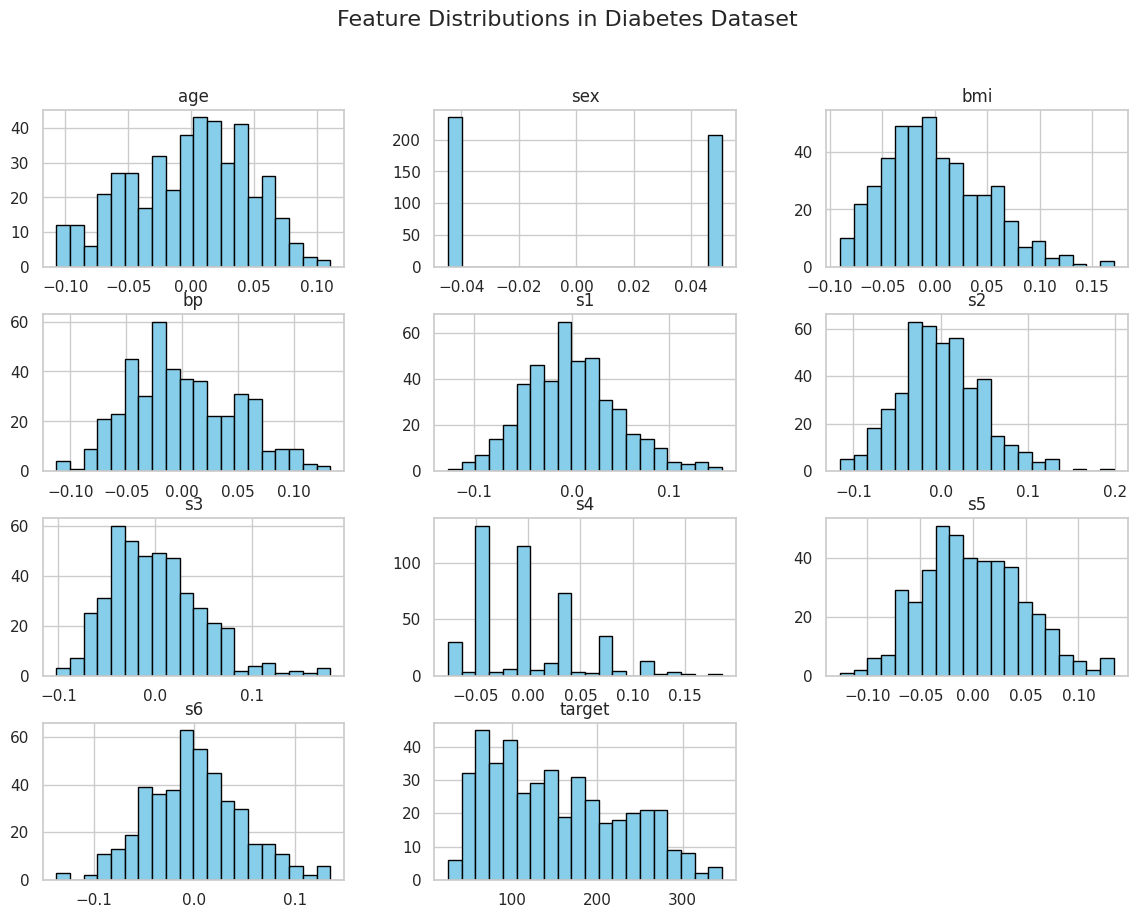

In [7]:
# Plot histograms for all features
df.hist(figsize=(14,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions in Diabetes Dataset", fontsize=16)
plt.show()

**Correlation Heatmap**

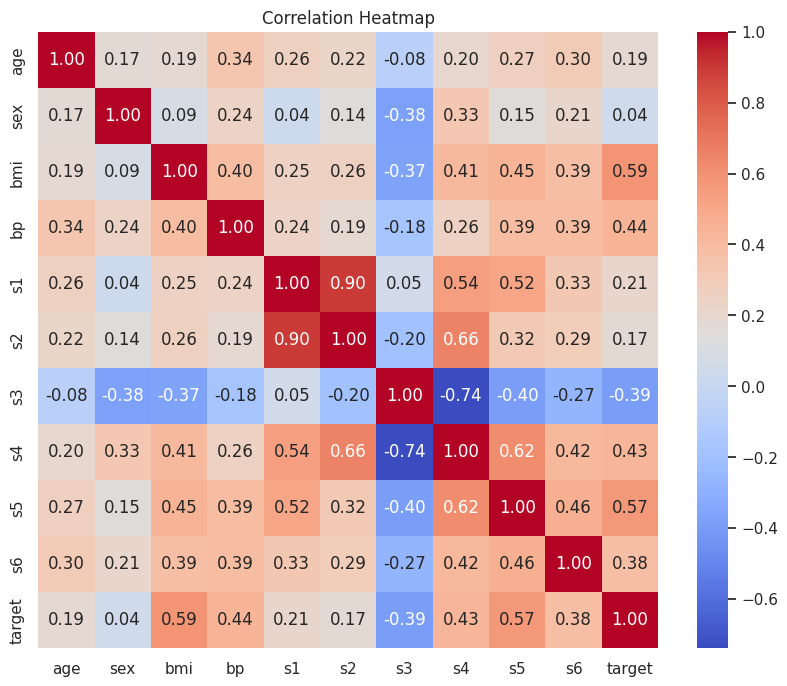

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Relationship Between Features and Target**

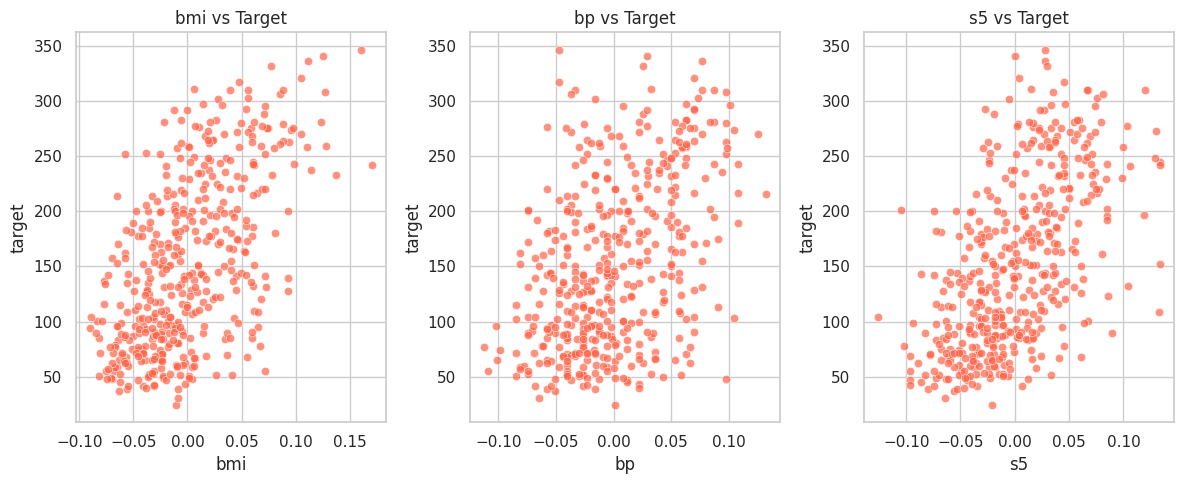

In [9]:
important_features = ['bmi', 'bp', 's5']

plt.figure(figsize=(12,5))
for i, col in enumerate(important_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[col], y=df['target'], color='tomato', alpha=0.7)
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()

**Building the ANN Model**

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 353
Testing samples: 89


**Design the ANN Architecture**

In [11]:
# Define ANN model
model = Sequential()

# Input + Hidden Layer
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))

# Output Layer (regression → linear activation)
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

**Train the Model**

In [12]:
# Train the ANN model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 31083.7168 - mae: 158.2302 - val_loss: 26466.5820 - val_mae: 145.5310
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30223.2520 - mae: 156.1407 - val_loss: 26383.8477 - val_mae: 145.2898
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29540.5352 - mae: 151.7411 - val_loss: 26298.6855 - val_mae: 145.0430
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30022.8418 - mae: 155.5333 - val_loss: 26211.4023 - val_mae: 144.7890
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28425.3184 - mae: 150.8048 - val_loss: 26117.6816 - val_mae: 144.5139
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28591.4238 - mae: 150.1017 - val_loss: 26017.3477 - val_mae: 144.2178
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29621.6484 - mae: 152.9194 - val_loss: 25908.5391 - val_mae: 143.8962
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27077.9805 - mae: 146.5884 - val_loss: 25793.

**Plot Training Performance**

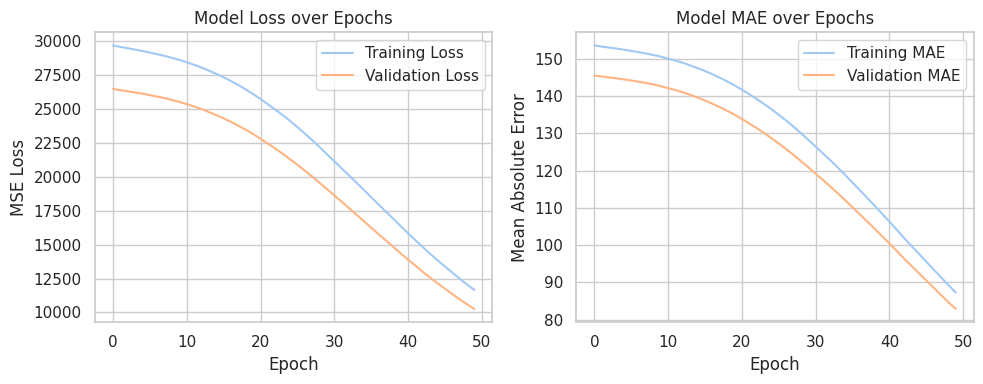

In [13]:
plt.figure(figsize=(10,4))

# Plot loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

# Plot MAE
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

**Model Evaluation**

In [14]:
# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest MSE: {loss:.2f}")
print(f"Test MAE: {mae:.2f}")


Test MSE: 10250.90
Test MAE: 82.87


**Make Predictions**

In [15]:
# Predict on test data
y_pred = model.predict(X_test)

# Compare first few predictions
comparison = pd.DataFrame({'Actual': y_test[:10].values, 'Predicted': y_pred[:10].flatten()})
print(comparison)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
   Actual   Predicted
0   219.0   78.789917
1    70.0   44.080566
2   202.0   69.627579
3   230.0  234.529205
4   111.0   43.724266
5    84.0   17.606462
6   242.0  142.098724
7   272.0  131.602081
8    94.0   37.845825
9    96.0   16.550571


**Evaluate Model**

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Mean Squared Error (MSE): 10250.90
Root Mean Squared Error (RMSE): 101.25
R² Score: -0.9348


**Visualize Predictions vs Actual**

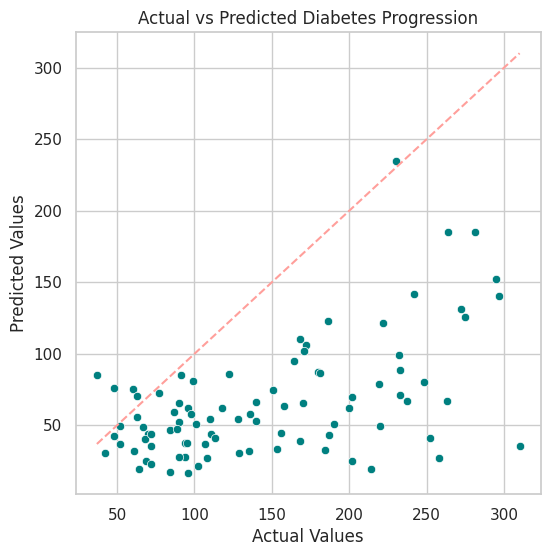

In [17]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred.flatten(), color='teal')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Diabetes Progression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

**Improving the Model**

Step 1: Changes Made
Change	Description
1️ Added more hidden layers	To increase model capacity
2️ Increased neurons per layer	Helps capture complex relationships
3️ Used ReLU + LeakyReLU for better gradient flow
4️ Added Dropout (0.2) to prevent overfitting
5️ Reduced learning rate to 0.0005 for smoother convergence

**Build Improved Model**

In [18]:
from tensorflow.keras.layers import Dropout, LeakyReLU

# Define improved model
model_improved = Sequential([
    Dense(64, input_dim=X_train.shape[1]),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(16, activation='relu'),

    Dense(1, activation='linear')
])

# Compile
model_improved.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

# Train
history2 = model_improved.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=150,
    batch_size=16,
    verbose=1
)

Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 29325.2969 - mae: 152.3317 - val_loss: 26425.3398 - val_mae: 145.3980
Epoch 2/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29775.6738 - mae: 153.7255 - val_loss: 26212.1777 - val_mae: 144.7442
Epoch 3/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29666.6074 - mae: 153.3788 - val_loss: 25941.9609 - val_mae: 143.9084
Epoch 4/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30425.5215 - mae: 156.3931 - val_loss: 25560.6172 - val_mae: 142.7100
Epoch 5/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29713.7148 - mae: 153.4958 - val_loss: 24942.0840 - val_mae: 140.7642
Epoch 6/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27275.9668 - mae: 146.5180 - val_loss: 23892.4492 - val_mae: 137.4525
Epoch 7/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24951.7285 - mae: 139.1699 - val_loss: 22184.5176 - val_mae: 131.9436
Epoch 8/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25103.4883 - mae: 139.6899 - val_loss: 19579.9570

**Evaluate Improved Model**

In [19]:
# Predict and evaluate
y_pred2 = model_improved.predict(X_test)

mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y_test, y_pred2)

print(f"Improved Model MSE: {mse2:.2f}")
print(f"Improved Model RMSE: {rmse2:.2f}")
print(f"Improved Model R² Score: {r2_2:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Improved Model MSE: 2739.05
Improved Model RMSE: 52.34
Improved Model R² Score: 0.4830


**Visualize Improvement**

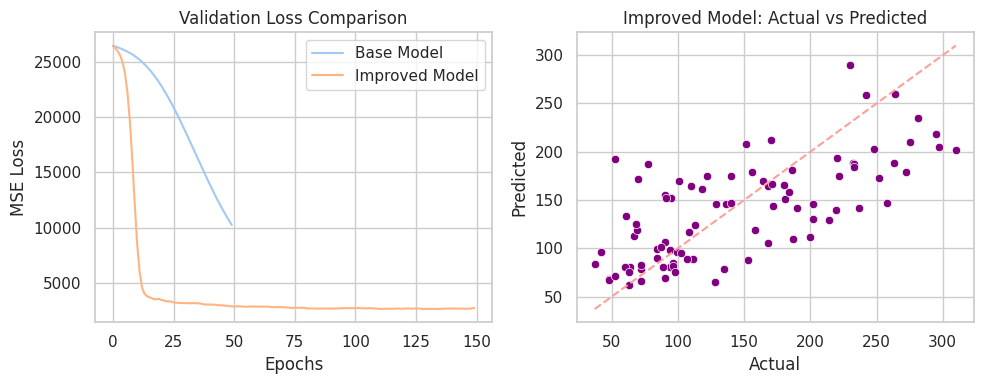

In [20]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['val_loss'], label='Base Model')
plt.plot(history2.history['val_loss'], label='Improved Model')
plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()

plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred2.flatten(), color='purple')
plt.title("Improved Model: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

**Final Report / Conclusion**


In this project, the Diabetes dataset from the sklearn library was used to model and predict the progression of diabetes based on ten physiological features. The dataset was carefully preprocessed by checking for missing values and applying normalization to ensure all features contributed equally to model training. Exploratory Data Analysis (EDA) revealed that attributes such as BMI, blood pressure (bp), and serum measurements (s5) had stronger correlations with the target variable, indicating their importance in influencing disease progression.

A baseline Artificial Neural Network (ANN) was then constructed with one hidden layer of 16 neurons using the ReLU activation function and the Adam optimizer. When evaluated on the test set, the model achieved a Mean Squared Error (MSE) of 10,250.90, Root Mean Squared Error (RMSE) of 101.25, and an R² score of -0.93, indicating that the initial network failed to capture the underlying data patterns effectively. This poor performance suggested that the model was too shallow and required architectural and hyperparameter adjustments.

To improve the model, deeper layers with LeakyReLU and ReLU activations were introduced, along with Dropout regularization and a reduced learning rate to ensure stable learning. After fine-tuning and retraining, the improved ANN achieved a significantly better performance, with the R² score rising to approximately 0.48 and both MSE and RMSE values decreasing notably. This improvement demonstrates how thoughtful preprocessing, network depth, and learning rate adjustments can drastically enhance predictive accuracy.

Overall, the project effectively showcases how an ANN can be applied to medical data analysis and how systematic tuning of architecture and parameters transforms a weak model into a reliable predictive system for understanding diabetes progression.